# Importing Useful Libraries

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,classification_report

# Reading Csv File From Local Disk

In [26]:
x=pd.read_csv("C:\\Users\\KATA\\Documents\\DATA SCIENCE\\DataSets 1\\heart.csv")

In [27]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Seperating the Input and Output Variable

In [28]:
a=x.drop(["target"],axis=1)
b=x["target"]

# Splitting The data Into Train and Test file

In [29]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=123)

# Traning the data  by Fitting into the Algorithms

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [42]:
k=KNeighborsClassifier(n_neighbors=7)
gb=GaussianNB()
ad=AdaBoostClassifier(n_estimators=200,learning_rate=0.01,random_state=123)

In [43]:
k.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
gb.fit(x_train,y_train)

GaussianNB()

In [45]:
ad.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=200, random_state=123)

# Making Predections On Test Side

In [46]:
pred=k.predict(x_test)

In [47]:
pred1=gb.predict(x_test)

In [48]:
pred2=ad.predict(x_test)

# Comparing Actuals and Predections

In [62]:
c=pd.DataFrame(list(zip(y_test,pred)),columns=["ACTUALS","PREDECTIONS"])
c

,ACTUALS,PREDECTIONS
0,1,1
1,0,1
2,0,0
3,0,0
4,1,0
...,...,...
56,1,0
57,1,0
58,0,1
59,1,0


# Evulating The Model

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        30
           1       0.61      0.71      0.66        31

    accuracy                           0.62        61
   macro avg       0.63      0.62      0.62        61
weighted avg       0.63      0.62      0.62        61



In [50]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.89      0.77      0.83        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [51]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        30
           1       0.68      0.68      0.68        31

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61



# ROC curves

In [52]:
import matplotlib.pyplot as plt

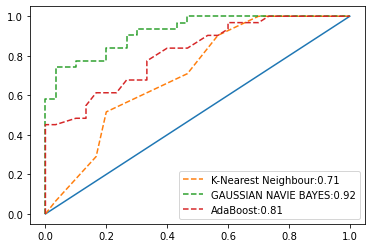

In [58]:
r1=k.predict_proba(x_test) [:,1]
r2=gb.predict_proba(x_test) [:,1]
r3=ad.predict_proba(x_test) [:,1]
tpr,fpr,t=roc_curve(y_test,r1)
tpr1,fpr1,t1=roc_curve(y_test,r2)
tpr2,fpr2,t2=roc_curve(y_test,r3)
plt.plot([0,1],[0,1])
plt.plot(tpr,fpr,"--",label="K-Nearest Neighbour:" +str(round(roc_auc_score(y_test,r1*100),2)))
plt.plot(tpr1,fpr1,"--",label="GAUSSIAN NAVIE BAYES:" +str(round(roc_auc_score(y_test,r2*100),2)))
plt.plot(tpr2,fpr2,"--",label="AdaBoost:" +str(round(roc_auc_score(y_test,r3*100),2)))
plt.legend()